In [1]:
# Importação das bibliotecas
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
PATH = '/content/drive/My Drive/TCCDataScience/datasets/mlsmall/'
movies = pd.read_csv(PATH+'movies.csv')
#genome_scores = pd.read_csv(PATH+'genome-scores.csv')
tags = pd.read_csv(PATH+'tags.csv')
#genome_tags = pd.read_csv(PATH+'genome-tags.csv')
#Use ratings data to downsample tags data to only movies with ratings 
ratings = pd.read_csv(PATH+'ratings.csv')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#AQUI IREMOS TRANSFORMAR A COLUNA GENEROS EM VARIAS COLUNAS BOOLEANAS
#PRIMEIRO CRIA-SE UM NOVO DATAFRAME A PARTIR DOS GENEROS DOS FILMES
generos = movies.genres.str.get_dummies()

#CONCATENA OS DOIS DATAFRAMES
dados_dos_filmes = pd.concat([movies, generos], axis=1)
dados_dos_filmes.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_dos_filmes.drop(['genres'], axis=1, inplace=True)

In [ ]:
dados_dos_filmes

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

ratings_f = ratings.groupby('userId').filter(lambda x: len(x) >= 55)

In [ ]:
# list the movie titles that survive the filtering
movie_list_rating = ratings_f.movieId.unique().tolist()

In [ ]:
# no worries: we have kept 97% of the original movie titles in ratings data frame
len(ratings_f.movieId.unique())/len(dados_dos_filmes.movieId.unique()) * 100

98.7990145760624

In [ ]:
# but only 57% of the users 
len(ratings_f.userId.unique())/len(ratings.userId.unique()) * 100

59.67213114754099

In [ ]:
dados_dos_filmes.shape

(9742, 22)

In [ ]:
filmes = dados_dos_filmes[dados_dos_filmes.movieId.isin(movie_list_rating)]

In [ ]:
filmes.shape

(9625, 22)

In [ ]:
filmes.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tags.drop(['timestamp'],1, inplace=True)
ratings_f.drop(['timestamp'],1, inplace=True)

In [ ]:
ratings_f1 = pd.merge(filmes, ratings_f, on="movieId", how="right")

In [ ]:
ratings_f1.head(3)

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4.0
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,4.5
2,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15,2.5


In [ ]:
ratings_f1.rating.unique()

array([4. , 4.5, 2.5, 3.5, 3. , 5. , 0.5, 2. , 1.5, 1. ])

Definir 3 classes
-1: 0 <= x < 2.5
0 : 2.5 <= x <= 3.5
1: 3.5 < x <= 5

In [ ]:
def genClass(input):
  if(input):
    if(input >= 0. and input <2.5):
      return 0
    if(input >= 2.5 and input <= 3.5):
      return 1
    if(input > 3.5 and input <= 5.0):
      return 2
    

In [ ]:
genClass(0.5)

0

In [ ]:
ratings_f1['rating_c'] = ratings_f1['rating'].apply(genClass)

In [ ]:
ratings_f1.head(3)

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,rating_c
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4.0,1
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,4.5,1
2,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15,2.5,0


In [ ]:
ratings_f1.iloc[0:, 24:].head(3)

,rating_c
0,1
1,1
2,0


In [ ]:
#criação dos previsores (variáveis independentes - X) e da classe (variável dependente - y)
 
previsores = ratings_f1.iloc[0:, 0:23]
classe = ratings_f1.iloc[0:, 24:]

In [ ]:
classe.rating_c.unique()

array([2, 1, 0])

In [ ]:
classe

,rating_c
0,2
1,2
2,1
3,2
4,1
...,...
92724,2
92725,1
92726,1
92727,1


In [ ]:
ratings_f1.shape

(92729, 25)

In [ ]:
previsores.info()
previsores.drop(['title'], axis=1, inplace=True)
previsores.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 92729 entries, 0 to 92728
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             92729 non-null  int64 
 1   title               92729 non-null  object
 2   (no genres listed)  92729 non-null  int64 
 3   Action              92729 non-null  int64 
 4   Adventure           92729 non-null  int64 
 5   Animation           92729 non-null  int64 
 6   Children            92729 non-null  int64 
 7   Comedy              92729 non-null  int64 
 8   Crime               92729 non-null  int64 
 9   Documentary         92729 non-null  int64 
 10  Drama               92729 non-null  int64 
 11  Fantasy             92729 non-null  int64 
 12  Film-Noir           92729 non-null  int64 
 13  Horror              92729 non-null  int64 
 14  IMAX                92729 non-null  int64 
 15  Musical             92729 non-null  int64 
 16  Mystery             92

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId
0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7
2,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15
3,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,17
4,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,18


In [ ]:
previsores.fillna(0)

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId
0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7
2,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15
3,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,17
4,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92724,193581,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,184
92725,193583,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,184
92726,193585,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,184
92727,193587,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184


In [ ]:
classe.shape
classe.fillna(0)

,rating_c
0,2
1,2
2,1
3,2
4,1
...,...
92724,2
92725,1
92726,1
92727,1


In [ ]:
# Transformação da classe para o formato "dummy", pois temos uma rede neural com 3 neurônios na camada de saída
classe_dummy = np_utils.to_categorical(classe)
classe_dummy

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe_dummy,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [ ]:
y_teste

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
# Criação da estrutura da rede neural com a classe Sequential (sequência de camadas)
modelo = Sequential()
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting

#primeira camada oculta, 5 neuronios, 4 neuronios de entrada
modelo.add(Dense(units = 15, activation = 'relu',  input_dim = 22))
modelo.add(Dropout(0.2))
#segunda camada oculta
modelo.add(Dense(units = 15, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 15, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 15, activation = 'relu'))  
modelo.add(Dropout(0.2)) 
#terceira camada oculta
modelo.add(Dense(units = 10, activation = 'relu'))
modelo.add(Dropout(0.2)) 
# Função softmax porque temos um problema de classificação com mais de duas classes 
#(é gerada uma probabilidade em cada neurônio)
modelo.add(Dense(units = 3, activation = 'softmax'))

In [ ]:
#testando outro modelo
# Criação da estrutura da rede neural com a classe Sequential (sequência de camadas)
modelo = Sequential()
#primeira camada oculta, 5 neuronios, 4 neuronios de entrada
modelo.add(Dense(units = 15, input_dim = 22))
#segunda camada oculta
modelo.add(Dense(units = 8))
#terceira camada oculta
modelo.add(Dense(units = 5))
# Função softmax porque temos um problema de classificação com mais de duas classes 
#(é gerada uma probabilidade em cada neurônio)
modelo.add(Dense(units = 3, activation = 'softmax'))

In [ ]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 15)                345       
_________________________________________________________________
dropout_8 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 15)                240       
_________________________________________________________________
dropout_9 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 15)                240       
_________________________________________________________________
dropout_10 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 15)               

In [ ]:
type(X_treinamento)

pandas.core.frame.DataFrame

In [ ]:
X_treinamento.to_numpy()

array([[  2579,      0,      0, ...,      0,      0,    178],
       [ 89939,      0,      0, ...,      0,      0,    177],
       [175401,      0,      0, ...,      0,      0,    105],
       ...,
       [  2770,      0,      0, ...,      0,      0,    474],
       [  2878,      0,      0, ...,      0,      0,    514],
       [  7445,      0,      1, ...,      0,      0,    232]])

In [ ]:


# Configuração dos parâmetros da rede neural (adam = algoritmo para atualizar os pesos e loss = cálculo do erro)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
# Treinamento, dividindo a base de treinamento em uma porção para validação (validation_data)
historico = modelo.fit(X_treinamento.to_numpy(), y_treinamento, epochs = 20,shuffle=True,
           validation_data = (X_teste.to_numpy(), y_teste))

Epoch 1/20
2029/2029 [==============================] - 3s 2ms/step - loss: 25.8323 - accuracy: 0.4417 - val_loss: 0.9950 - val_accuracy: 0.4695
Epoch 2/20
2029/2029 [==============================] - 3s 2ms/step - loss: 1.4395 - accuracy: 0.4708 - val_loss: 0.9945 - val_accuracy: 0.4695
Epoch 3/20
2029/2029 [==============================] - 3s 2ms/step - loss: 1.0989 - accuracy: 0.4723 - val_loss: 0.9946 - val_accuracy: 0.4695
Epoch 4/20
2029/2029 [==============================] - 3s 2ms/step - loss: 1.0128 - accuracy: 0.4731 - val_loss: 0.9945 - val_accuracy: 0.4695
Epoch 5/20
2029/2029 [==============================] - 3s 2ms/step - loss: 1.0069 - accuracy: 0.4730 - val_loss: 0.9946 - val_accuracy: 0.4695
Epoch 6/20
2029/2029 [==============================] - 4s 2ms/step - loss: 1.0089 - accuracy: 0.4730 - val_loss: 0.9947 - val_accuracy: 0.4695
Epoch 7/20
2029/2029 [==============================] - 6s 3ms/step - loss: 0.9959 - accuracy: 0.4731 - val_loss: 0.9947 - val_accuracy

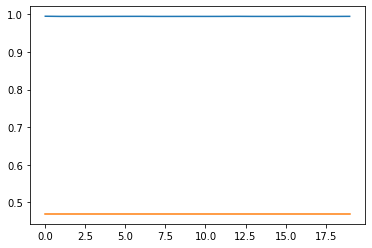

In [ ]:
import matplotlib.pyplot as plt
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [ ]:
# Previsões e mudar a variável para True ou False de acordo com o threshold 0.5
previsoes = modelo.predict(X_teste)
#previsoes = (previsoes > 0.5)
previsoes

array([[0.13118887, 0.39115947, 0.47765166],
       [0.13118887, 0.39115947, 0.47765166],
       [0.13118887, 0.39115947, 0.47765166],
       ...,
       [0.13118887, 0.39115947, 0.47765166],
       [0.13118887, 0.39115947, 0.47765166],
       [0.13118887, 0.39115947, 0.47765166]], dtype=float32)

In [ ]:
# Como é um problema com três saídas, precisamos buscar a posição que possui o maior valor (são retornados 3 valores)
y_teste_matrix = [np.argmax(t) for t in y_teste]
y_previsao_matrix = [np.argmax(t) for t in previsoes]

In [ ]:
# Geração da matriz de confusão
confusao = confusion_matrix(y_teste_matrix, y_previsao_matrix)
confusao

array([[    0,     0,  3816],
       [    0,     0, 10942],
       [    0,     0, 13061]])

In [ ]:
# Criação do classificador Random Forest
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Previsões
previsoes = floresta.predict(X_teste)
previsoes

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
matriz = confusion_matrix(y_teste, previsoes)
matriz

ValueError: ignored

In [ ]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.4579603867860096

In [ ]:
previsores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92729 entries, 0 to 92728
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   movieId             92729 non-null  int64
 1   (no genres listed)  92729 non-null  int64
 2   Action              92729 non-null  int64
 3   Adventure           92729 non-null  int64
 4   Animation           92729 non-null  int64
 5   Children            92729 non-null  int64
 6   Comedy              92729 non-null  int64
 7   Crime               92729 non-null  int64
 8   Documentary         92729 non-null  int64
 9   Drama               92729 non-null  int64
 10  Fantasy             92729 non-null  int64
 11  Film-Noir           92729 non-null  int64
 12  Horror              92729 non-null  int64
 13  IMAX                92729 non-null  int64
 14  Musical             92729 non-null  int64
 15  Mystery             92729 non-null  int64
 16  Romance             92729 non-null  int6

In [ ]:
# Configuração dos parâmetros da rede neural (adam = algoritmo para atualizar os pesos e loss = cálculo do erro)
modelo.compile(optimizer = 'SGD', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
# Treinamento, dividindo a base de treinamento em uma porção para validação (validation_data)
modelo.fit(X_treinamento.to_numpy(), y_treinamento, epochs = 20,shuffle=True,
           validation_data = (X_teste.to_numpy(), y_teste))

Epoch 1/20
2029/2029 [==============================] - 2s 1ms/step - loss: 0.6687 - accuracy: 0.6088 - val_loss: 0.6715 - val_accuracy: 0.6067
Epoch 2/20
2029/2029 [==============================] - 2s 1ms/step - loss: 0.6687 - accuracy: 0.6091 - val_loss: 0.6694 - val_accuracy: 0.6067
Epoch 3/20
2029/2029 [==============================] - 2s 1ms/step - loss: 0.6687 - accuracy: 0.6087 - val_loss: 0.6695 - val_accuracy: 0.6067
Epoch 4/20
2029/2029 [==============================] - 2s 1ms/step - loss: 0.6687 - accuracy: 0.6087 - val_loss: 0.6693 - val_accuracy: 0.6067
Epoch 5/20
2029/2029 [==============================] - 2s 1ms/step - loss: 0.6687 - accuracy: 0.6087 - val_loss: 0.6694 - val_accuracy: 0.6067
Epoch 6/20
2029/2029 [==============================] - 2s 1ms/step - loss: 0.6687 - accuracy: 0.6086 - val_loss: 0.6694 - val_accuracy: 0.6067
Epoch 7/20
2029/2029 [==============================] - 2s 1ms/step - loss: 0.6688 - accuracy: 0.6084 - val_loss: 0.6694 - val_accuracy:

In [ ]:
previsoes = modelo.predict(X_teste)
previsoes = (previsoes > 0.5)
previsoes

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

In [ ]:
# Como é um problema com três saídas, precisamos buscar a posição que possui o maior valor (são retornados 3 valores)
y_teste_matrix = [np.argmax(t) for t in y_teste]
y_previsao_matrix = [np.argmax(t) for t in previsoes]

In [ ]:
# Geração da matriz de confusão
confusao = confusion_matrix(y_teste_matrix, y_previsao_matrix)
confusao

array([[    0, 10942],
       [    0, 16877]])